# **Twitch Streamers**

---

In [ ]:
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Index
* [1. Import packages](#import_packages)
* [2. Read data](#read)
* [3. Data info](#data_info)
* [4. Data cleaning](#data_cleaning)
    * [4.1 NA Values](#na)
* [5. Data analysis](#data_analysis)
    * [5.1 Mature streamers](#mature)
    * [5.2 Languages](#languages)
    * [5.3 Most viewed streamers](#most_viewed)
* [6. Heatmap](#heatmap)

## 1. Import packages
<a id='import_packages'></a>

In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read data
<a id='read'></a>

In [3]:
path = os.getcwd()
filename = "twitchdata-update.csv"

fullpath = os.path.join(path, filename)

In [4]:
tw = pd.read_csv(fullpath)
tw.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


## 3. Data info
<a id='data_info'></a>

In [5]:
print(f"This data frame about Twitch streamers, has {tw.shape[0]} rows and {tw.shape[1]} columns.")

This data frame about Twitch streamers, has 1000 rows and 11 columns.


In [6]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


## 4. Data cleaning
<a id='data_cleaning'></a>

### 4.1 NA Values
<a id='na'></a>

In [7]:
tw.isna().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

This data frame is amazing! We don't have any NA or NaN values!
<br>
We can keep going without worrying about NA values.

## 5. Data analysis
<a id='data_analysis'></a>

### 5.1 Mature streamers
<a id='mature'></a>

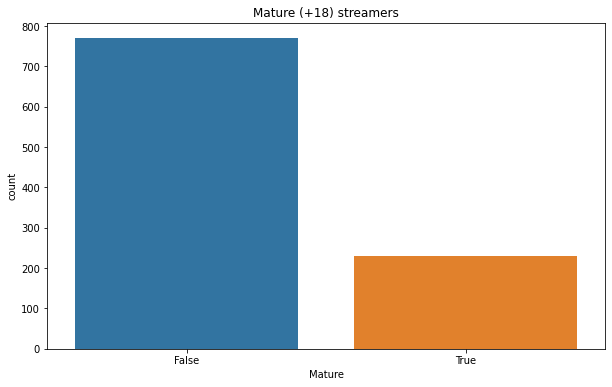

In [8]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="Mature", data=tw)
plt.title("Mature (+18) streamers")
plt.show()

We can see most of the streamers are mature, but we have other part which they are not mature, maybe younger people finding his job in this streamer job.

### 5.2 Languages
<a id='languages'></a>count

In [9]:
languages_values = tw["Language"].value_counts()
languages_values

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Greek           1
Other           1
Swedish         1
Slovak          1
Finnish         1
Name: Language, dtype: int64

In [10]:
languages = tw["Language"].unique()
languages

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

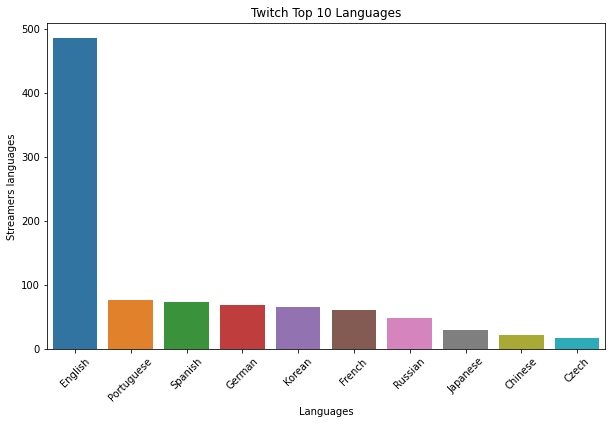

In [11]:
fig = plt.figure(figsize=(10, 6))
languages_sns = sns.barplot(x=languages[:10], y=languages_values[:10])
languages_sns.set(xlabel="Languages", ylabel="Streamers languages")
plt.title("Twitch Top 10 Languages")
plt.xticks(rotation=45)
plt.show()

### 5.3 Most viewed streamers
<a id='most_viewed'></a>

In [12]:
def get_top_viewed_streamers_plot(language):
    '''Get streamers stream language and make a plot with the TOP streamers'''
    
    filter_lng = language.title()
    streamers_language = tw.loc[tw["Language"] == filter_lng]
    streamers_language.reset_index(drop=True, inplace=True)
    
    streamer = streamers_language["Channel"]
    most_viewed = streamers_language["Watch time(Minutes)"]
    
    fig = plt.figure(figsize=(10, 6))
    plot = sns.barplot(x=streamer[:10], y=most_viewed[:10], palette="muted")
    plt.title(f"Top 10 streamers most viewed in {language} in 2020")
    plt.xticks(rotation=45)
    plt.show()

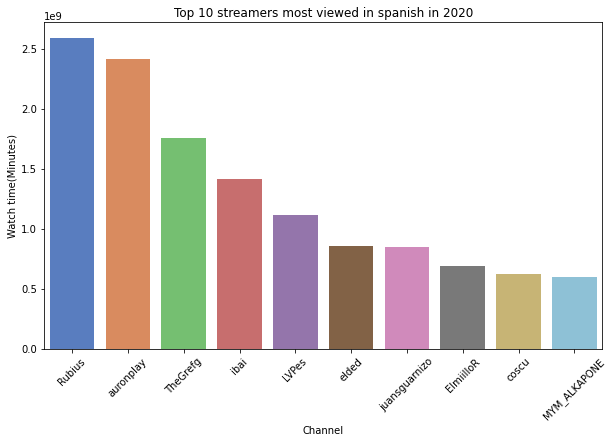

In [13]:
get_top_viewed_streamers_plot("spanish")

### 5.4 Streamers with most followers

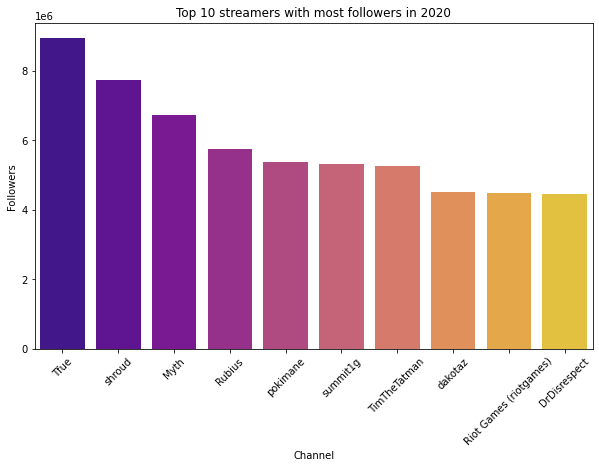

In [63]:
test_df = tw[["Channel", "Followers"]]
test_df = test_df.sort_values(by="Followers", ascending=False)

fig = plt.figure(figsize=(10, 6))
followers = sns.barplot(x=test_df["Channel"][:10], y=test_df["Followers"][:10], palette="plasma")
plt.title("Top 10 streamers with most followers in 2020")
plt.xticks(rotation=45)
plt.show()

With this plot, we can see the streamers with most followers in Twitch in *2020*.
<br>
As well, we have:
* **shroud** good streamer related with shooter games (Valorant, PUBG, EFT).
* **Rubius** one of the first YouTubers in Spain with his special content, very famous.
* **Riot Games** maker of LOL and Valorant.
* **DrDisrespect** excellent streamer related with Call of Duty.

## 6. Heatmap
<a id='heatmap'></a>

**Correlation matrix**
<br>
*.corr()* -> Make the correlation matrix with our variables in our data frame

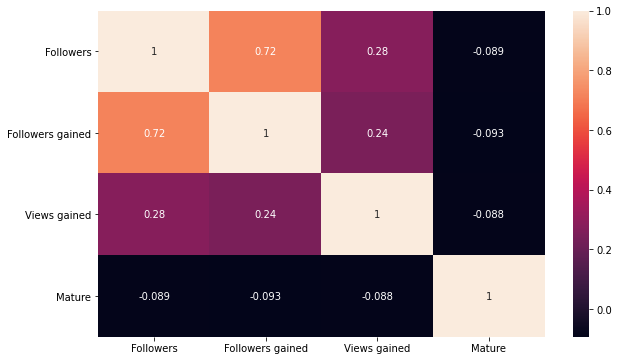

In [64]:
fig = plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(tw[["Channel", "Followers", "Followers gained", "Views gained", "Mature", "Language"]].corr(), annot=True)
plt.show()

With this *heatmap* or *correlation matrix*, we can't get a lot of conclusions.
<br>
The variables with most relation with each other are *Followers* and *Followers gained* something obvious, but we can take it and keep it in mind.